In [1]:
# For demonstration purposes, I will be using only the top 5 cryptos
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd

# Some visualization options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '765a8c72-c8dd-4727-8331-3cfc976b22d6',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [2]:
type(data)

dict

In [3]:
pd.json_normalize(data['status'])

,timestamp,error_code,error_message,elapsed,credit_count,notice,total_count
0,2023-01-17T09:48:24.628Z,0,None,65,1,None,8869


In [4]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now', utc=True).floor('S')

In [5]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'5',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '765a8c72-c8dd-4727-8331-3cfc976b22d6',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

# Use this if you just want to keep it in a dataframe
df2 = pd.json_normalize(data['data'])
df2['timestamp'] = pd.to_datetime('now', utc=True).floor('S')
df = df.append(df2)

# Use this if you want to create a CSV and append data to it
# df = pd.json_normalize(data['data'])
# df['timestamp'] = pd.to_datetime('now')
# df

# if not os.path.isfile(r'C:\Users\Davide\Desktop\Crypto Automation Project\API.csv'):
#     df.to_csv(r'C:\Users\Davide\Desktop\Crypto Automation Project\API.csv', header='column_names')
# else:
#     df.to_csv(r'C:\Users\Davide\Desktop\Crypto Automation Project\API.csv', mode='a', header=False)
        
# Then to read in the file
# dfr = pd.read_csv(r'C:\Users\Davide\Desktop\Crypto Automation Project\API.csv')
# dfr

C:\Users\Davide\AppData\Local\Temp\ipykernel_10212\3861568457.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


In [6]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [7]:
# Formatting to be able to see better numbers in this case
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [8]:
# Coin trends over time on average

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.06427,1.73591,22.64528,26.58705,26.42095,9.98960
Ethereum,-0.00555,1.50787,17.80967,32.73366,28.84906,20.02487
Tether,0.00100,-0.02939,0.00723,-0.00112,0.06876,-0.00442
BNB,0.07298,0.84142,9.40141,22.39425,10.80441,10.87648
USD Coin,-0.00056,0.01458,0.00855,0.00538,-0.01637,0.00209
XRP,-0.15399,0.72228,11.50308,10.36641,1.51888,-15.16922
Binance USD,-0.01360,0.06477,0.00988,0.08293,0.02371,0.05269
Cardano,0.16319,0.26641,10.52242,32.63579,6.97118,-2.10211
Dogecoin,-0.18847,-0.01309,9.73806,7.43452,-1.44497,41.71150


In [9]:
# Getting a stacked (row) visualization
df4 = df3.stack()

In [10]:
# Stacking df3 changed the type from Dataframe to Series
type(df4)

pandas.core.series.Series

In [11]:
# Fixing data type
df5 = df4.to_frame(name='values')

In [12]:
# Now we got the desired data type back to Dataframe
type(df5)

pandas.core.frame.DataFrame

In [13]:
# Indexing the whole list
df6 = df5.reset_index()

In [14]:
# Formatting percent_change column header and values
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.06427
1,Bitcoin,24h,1.73591
2,Bitcoin,7d,22.64528
3,Bitcoin,30d,26.58705
4,Bitcoin,60d,26.42095
5,Bitcoin,90d,9.98960
6,Ethereum,1h,-0.00555
7,Ethereum,24h,1.50787
8,Ethereum,7d,17.80967
9,Ethereum,30d,32.73366


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

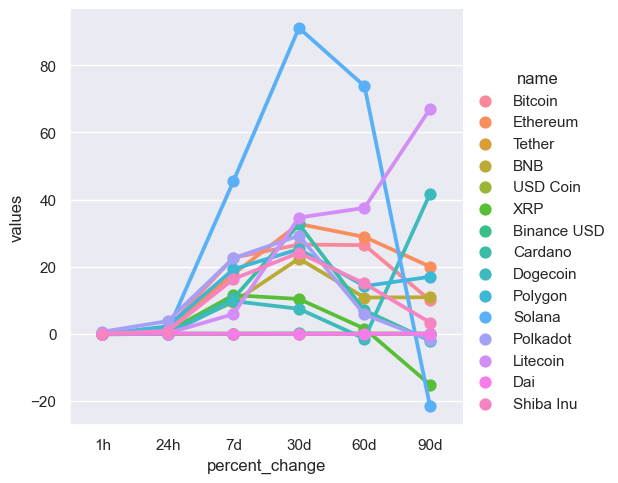

In [25]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')
plt.show()